In [1]:
dynres = readRDS('./dynbenchmark_results/06-benchmark/benchmark_results_unnormalised.rds')
methods = readRDS('./dynbenchmark_results/03-methods/methods.rds')
dynressum = readRDS('./dynbenchmark_results/06-benchmark/benchmark_results_normalised.rds')
dynres.weights = readRDS('./dynbenchmark_results/06-benchmark/dataset_source_weights.rds')

In [2]:
require(data.table)
dynbenchmark_res=data.table(dynres)
dynbenchmark_res = dynbenchmark_res[(method_id %in% methods$id[methods$source=='tool'|methods$id %in% c("angle", "comp1", "mst")]),]
dynbenchmark_res$weights = dynres.weights[1]
dynbenchmark_res$weights[startsWith(dynbenchmark_res$dataset_id,'real/silver')]=dynres.weights[2]
dynbenchmark_res$weights[startsWith(dynbenchmark_res$dataset_id,'synthetic/dyngen')]=dynres.weights[3]
dynbenchmark_res$weights[startsWith(dynbenchmark_res$dataset_id,'synthetic/dyntoy')]=dynres.weights[4]
dynbenchmark_res$weights[startsWith(dynbenchmark_res$dataset_id,'synthetic/prosstt')]=dynres.weights[5]
dynbenchmark_res$weights[startsWith(dynbenchmark_res$dataset_id,'synthetic/splatter')]=dynres.weights[6]

dynbenchmark_res[,scaled_correlation:= pnorm( (correlation - mean(correlation))/sd(correlation)),by=dataset_id]
dynbenchmark_res[,scaled_featureimp_wcor:= pnorm( (featureimp_wcor - mean(featureimp_wcor))/sd(featureimp_wcor)),by=dataset_id]
dynbenchmark_res[,scaled_F1_branches:= pnorm( (F1_branches - mean(F1_branches))/sd(F1_branches)),by=dataset_id]
dynbenchmark_res[,scaled_him:= pnorm( (him - mean(him))/sd(him)),by=dataset_id]


dynbenchmark_res_scales = dynbenchmark_res[,.(mean_correlation =  mean(correlation),
                                       sd_correlation =  sd(correlation),
                                      mean_featureimp_wcor =  mean(featureimp_wcor),
                                       sd_featureimp_wcor =  sd(featureimp_wcor),
                                      mean_F1_branches =  mean(F1_branches),
                                       sd_F1_branches =  sd(F1_branches),
                                      mean_him =  mean(him),
                                       sd_him =  sd(him)),by=dataset_id]

agg_perfs = dynbenchmark_res[,list(scaled_correlation=mean(scaled_correlation),
               scaled_featureimp_wcor=mean(scaled_featureimp_wcor),
               scaled_F1_branches=mean(scaled_F1_branches),
               scaled_him=mean(scaled_him), weights=weights[1]),by=c('dataset_source','method_id','dataset_trajectory_type')] [,
           list(scaled_correlation=mean(scaled_correlation*weights)/mean(weights),
               scaled_featureimp_wcor=mean(scaled_featureimp_wcor*weights)/mean(weights),
               scaled_F1_branches=mean(scaled_F1_branches*weights)/mean(weights),
               scaled_him=mean(scaled_him*weights)/mean(weights)),by=c('method_id','dataset_trajectory_type')][
    ,list(scaled_correlation=mean(scaled_correlation),
               scaled_featureimp_wcor=mean(scaled_featureimp_wcor),
               scaled_F1_branches=mean(scaled_F1_branches),
               scaled_him=mean(scaled_him)),by=method_id
][,overall:=(scaled_correlation*scaled_featureimp_wcor*scaled_F1_branches*scaled_him)**(0.25),][order(overall,decreasing=T),c('method_id','overall')]

agg_perfs


Loading required package: data.table


method_id,overall
<chr>,<dbl>
slingshot,0.7415034
paga_tree,0.7297458
scorpius,0.7118442
fateid,0.6903259
paga,0.6825827
tscan,0.6765296
angle,0.6719193
mst,0.6608148
waterfall,0.6598613


In [3]:
structdr_res = read.csv('./structdr.perf.txt',sep='\t',header=F)
names(structdr_res)<-c('V1','dataset','model','threshold','betweenness_centrality','correlation','featureimp_wcor','F1_branches','him')
structdr_res$dataset = as.character(structdr_res$dataset)
structdr_res$dataset = gsub('./data/dynverse_data_v2/|.rds','',structdr_res$dataset)
structdr_res=data.table(structdr_res)
stopifnot(dim(structdr_res)[1]==339)

In [4]:

structdr_res$weights = dynres.weights[1]
structdr_res$weights[startsWith(structdr_res$dataset,'real/silver')] = dynres.weights[2]
structdr_res$weights[startsWith(structdr_res$dataset,'synthetic/dyngen')] = dynres.weights[3]
structdr_res$weights[startsWith(structdr_res$dataset,'synthetic/dyntoy')] = dynres.weights[4]
structdr_res$weights[startsWith(structdr_res$dataset,'synthetic/prosstt')] = dynres.weights[5]
structdr_res$weights[startsWith(structdr_res$dataset,'synthetic/splatter')] = dynres.weights[6]
structdr_res$model = gsub('.*expression','',structdr_res$model)
structdr_res = structdr_res[!is.na(structdr_res$dataset),]
model_count=sort(table(paste(structdr_res$model,structdr_res$threshold)))

#normalize with the same mean and sd as dynbenchmark
structdr_res = cbind(structdr_res,dynbenchmark_res_scales[match(structdr_res$dataset,dynbenchmark_res_scales$dataset_id),])
structdr_res[,scaled_correlation:= pnorm( (correlation - mean_correlation)/sd_correlation),by=dataset_id]
structdr_res[,scaled_featureimp_wcor:= pnorm( (featureimp_wcor - mean_featureimp_wcor)/sd_featureimp_wcor),by=dataset_id]
structdr_res[,scaled_F1_branches:= pnorm( (F1_branches - mean_F1_branches)/sd_F1_branches),by=dataset_id]
structdr_res[,scaled_him:= pnorm( (him - mean_him)/sd_him),by=dataset_id]
structdr_res[,dataset_trajectory_type:=dynbenchmark_res[match(structdr_res$dataset,dataset_id),dataset_trajectory_type]]

#obtain dynbenchmark score
structdr_res_score = structdr_res[paste(model,threshold) %in% names(model_count[model_count==339]),list(scaled_correlation=mean(scaled_correlation),
               scaled_featureimp_wcor=mean(scaled_featureimp_wcor),
               scaled_F1_branches=mean(scaled_F1_branches),
               scaled_him=mean(scaled_him), weights=weights[1]),by=c('dataset','dataset_trajectory_type')] [,
           list(scaled_correlation=mean(scaled_correlation*weights)/mean(weights),
               scaled_featureimp_wcor=mean(scaled_featureimp_wcor*weights)/mean(weights),
               scaled_F1_branches=mean(scaled_F1_branches*weights)/mean(weights),
               scaled_him=mean(scaled_him*weights)/mean(weights)),by=c('dataset_trajectory_type')][
    ,list(scaled_correlation=mean(scaled_correlation),
               scaled_featureimp_wcor=mean(scaled_featureimp_wcor),
               scaled_F1_branches=mean(scaled_F1_branches),
               scaled_him=mean(scaled_him)),
][,overall:=(scaled_correlation*scaled_featureimp_wcor*scaled_F1_branches*scaled_him)**(0.25),][order(overall,decreasing=T)]
structdr_res_score

scaled_correlation,scaled_featureimp_wcor,scaled_F1_branches,scaled_him,overall
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
0.8356851,0.7967836,0.7126547,0.7407319,0.7699824


In [5]:
agg_perfs_structdr = rbind(data.frame(method_id='StructDR+GraphDR', overall=structdr_res_score$overall),agg_perfs)
agg_perfs_structdr$name = methods$name[match(agg_perfs_structdr$method_id,methods$id)]
agg_perfs_structdr$name[1] = 'StructDR+GraphDR'
agg_perfs_structdr$name = factor(agg_perfs_structdr$name,levels=agg_perfs_structdr$name)

Loading required package: ggplot2


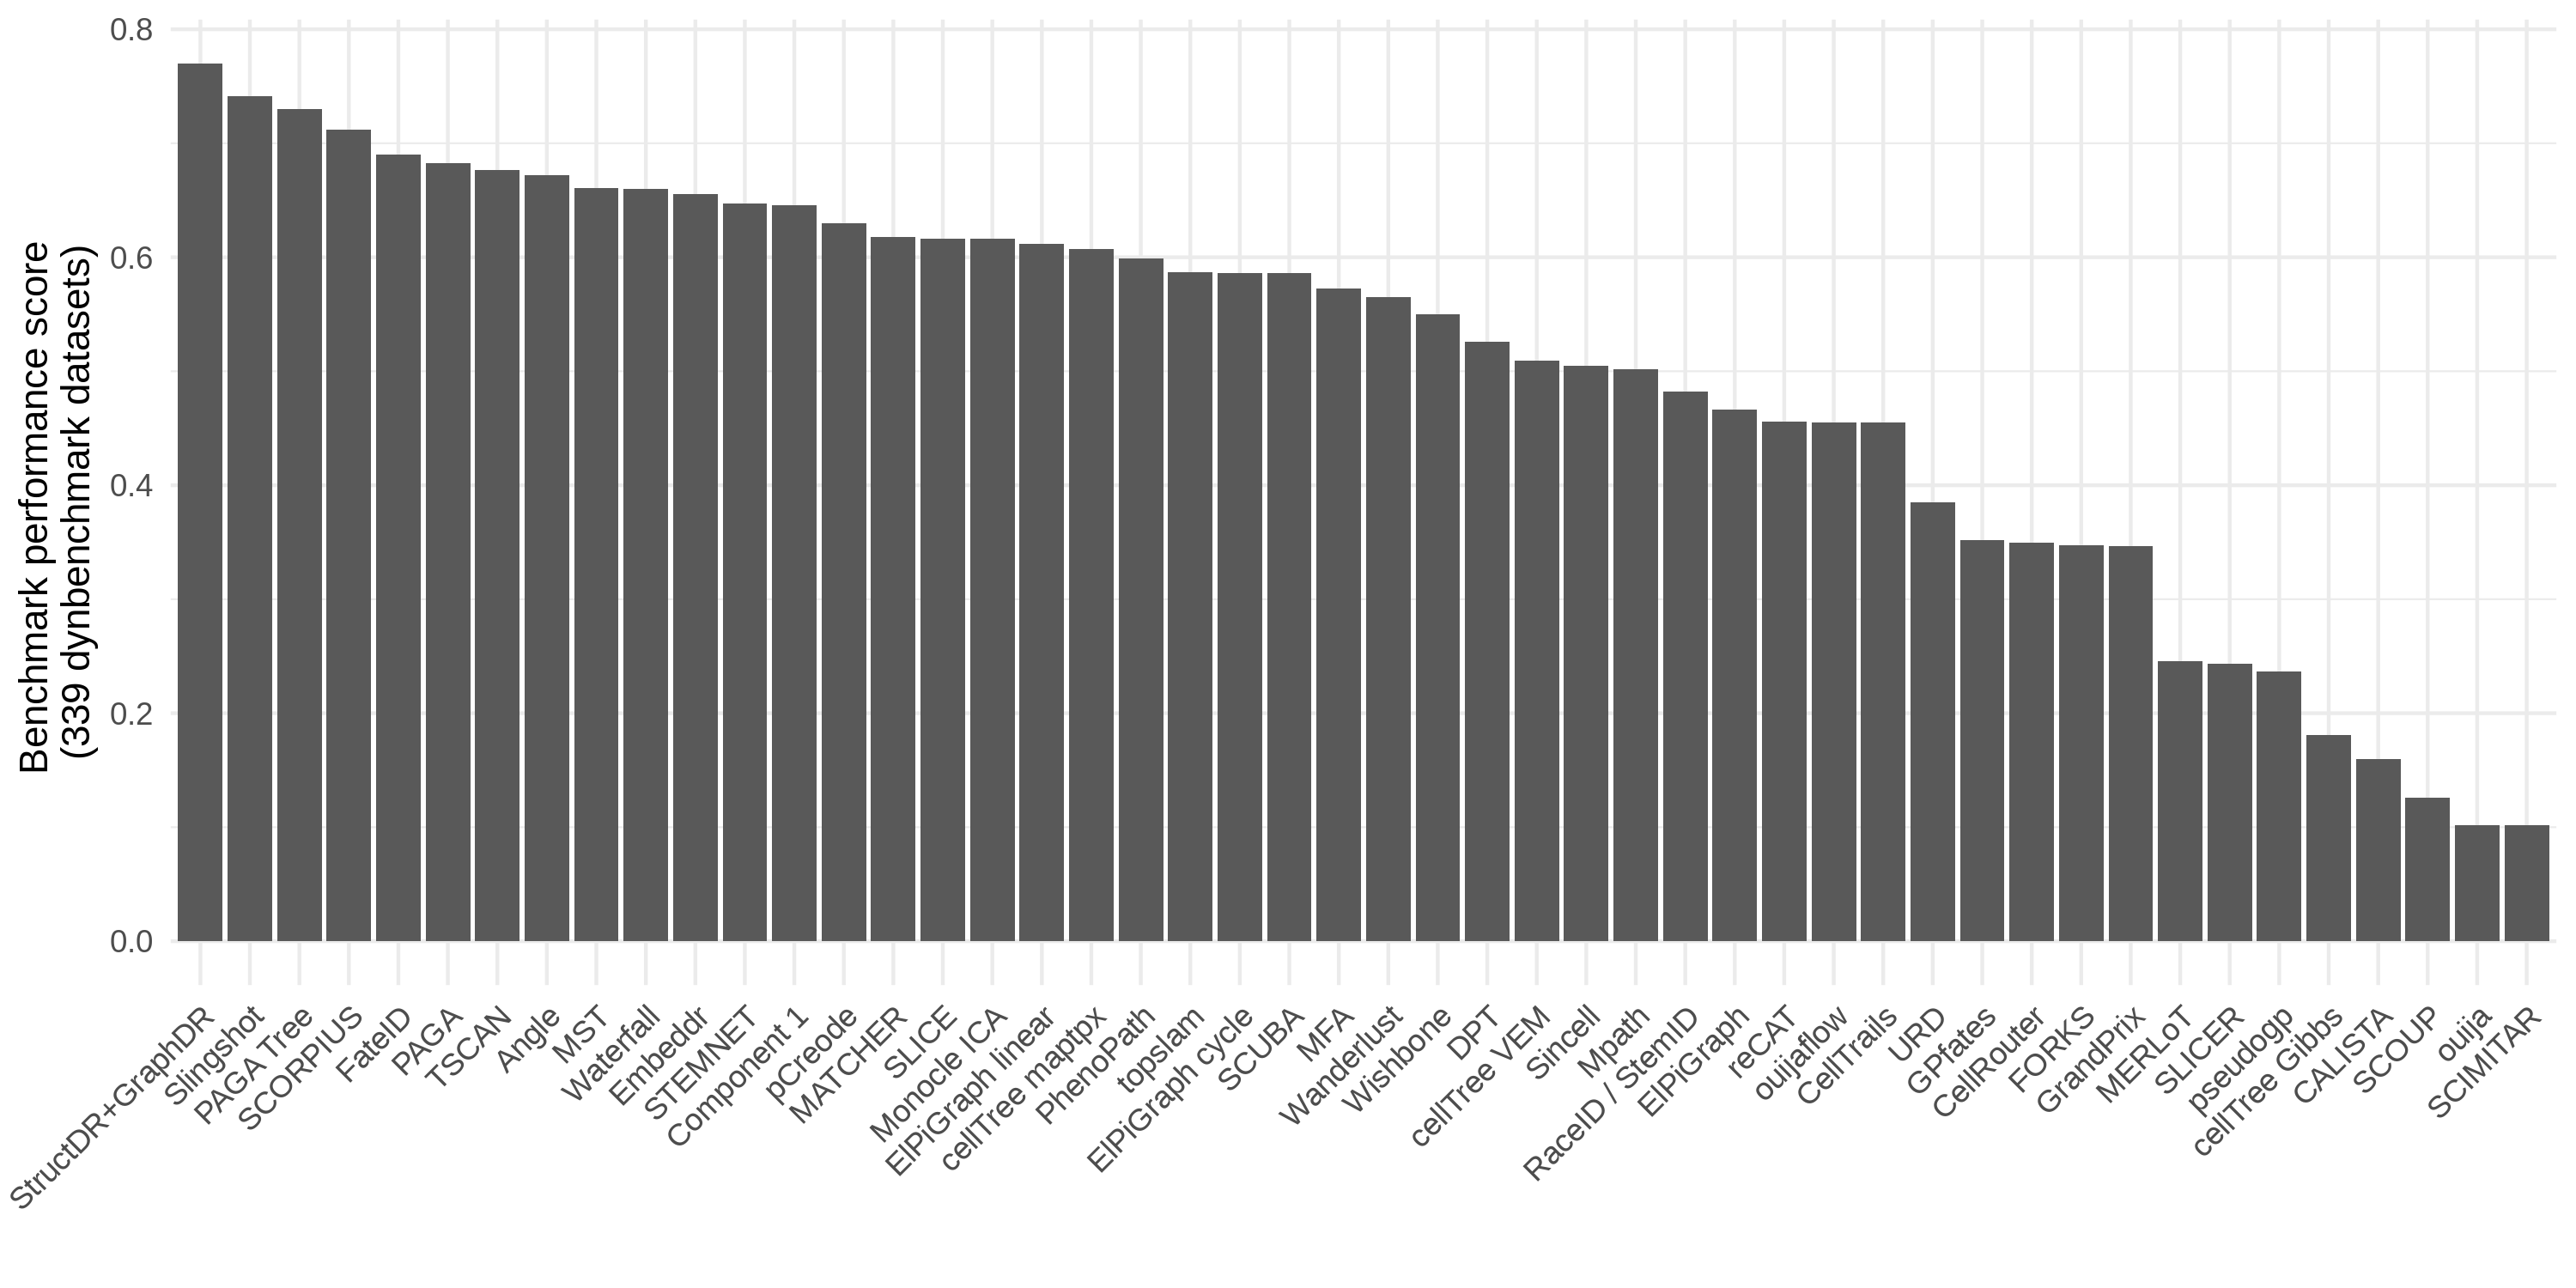

In [6]:
require(ggplot2)
options(repr.plot.width = 10, repr.plot.height = 5, repr.plot.res = 300)
ggplot(agg_perfs_structdr)+geom_bar(aes(x=name,y=overall),stat='identity')+
ylab("Benchmark performance score \n(339 dynbenchmark datasets)")+xlab('')+theme_minimal()+ theme(axis.text.x = element_text(angle = 45, hjust = 1))
ggsave('./figures/dynbenchmark.overall.sum.pdf',width=12,height=4)

In [7]:
agg_perfs_structdr

method_id,overall,name
<fct>,<dbl>,<fct>
StructDR+GraphDR,0.7699824,StructDR+GraphDR
slingshot,0.7415034,Slingshot
paga_tree,0.7297458,PAGA Tree
scorpius,0.7118442,SCORPIUS
fateid,0.6903259,FateID
paga,0.6825827,PAGA
tscan,0.6765296,TSCAN
angle,0.6719193,Angle
mst,0.6608148,MST


Loading required package: tidyverse
── Attaching packages ─────────────────────────────────────── tidyverse 1.2.1 ──
✔ tibble  2.1.1       ✔ purrr   0.3.2  
✔ tidyr   0.8.3       ✔ dplyr   0.8.0.1
✔ readr   1.3.1       ✔ stringr 1.4.0  
✔ tibble  2.1.1       ✔ forcats 0.4.0  
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::between()   masks data.table::between()
✖ dplyr::filter()    masks stats::filter()
✖ dplyr::first()     masks data.table::first()
✖ dplyr::lag()       masks stats::lag()
✖ dplyr::last()      masks data.table::last()
✖ purrr::transpose() masks data.table::transpose()


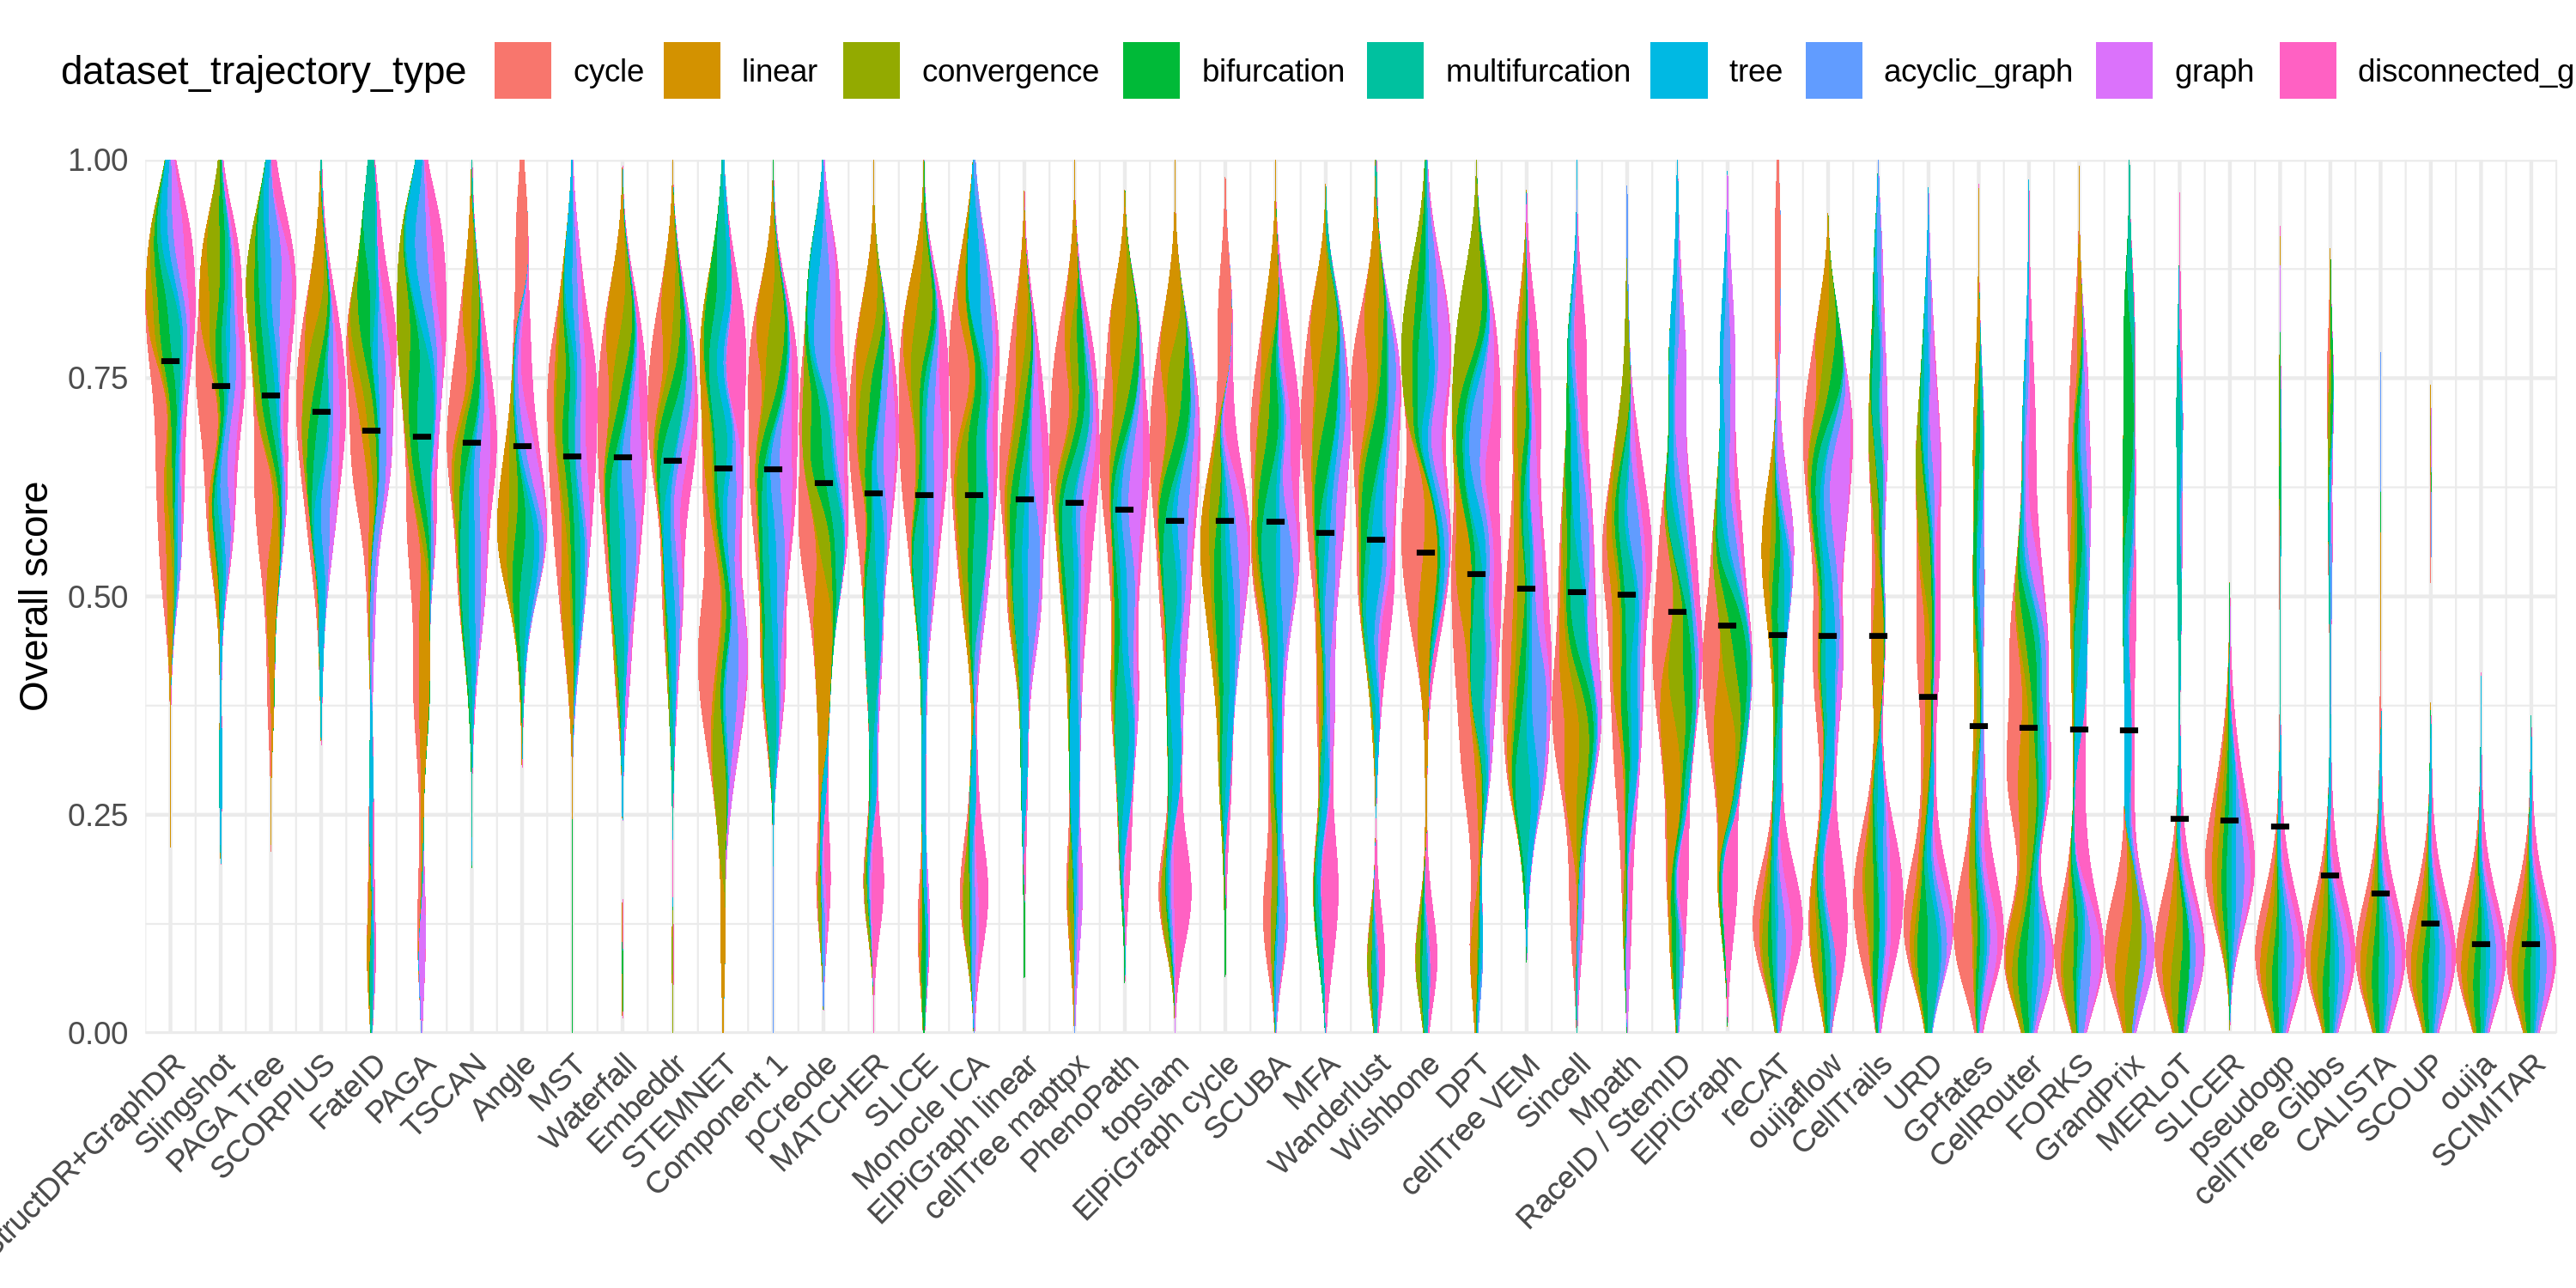

In [8]:
require(tidyverse)

dynbenchmark_res[,agg_perfs:= (scaled_correlation * scaled_featureimp_wcor* scaled_F1_branches* scaled_him)**(0.25)]
structdr_res[,agg_perfs:= (scaled_correlation * scaled_featureimp_wcor* scaled_F1_branches* scaled_him)**(0.25)]

plotdata = rbind(dynbenchmark_res[,.(method_id,dataset_id,dataset_trajectory_type,agg_perfs)],
                 structdr_res[,
                    .(method_id='StructDR+GraphDR',dataset_id=dataset, dataset_trajectory_type,agg_perfs)])
plotdata$name = methods$name[match(plotdata$method_id, methods$id)]
plotdata$name[is.na(plotdata$name)]=plotdata$method_id[is.na(plotdata$name)]
method_order=agg_perfs_structdr$name

densities <-
  plotdata %>%
  group_by(name, dataset_trajectory_type) %>%
  summarise(density = list(density(agg_perfs, bw = 0.05, from = 0, to = 1, n = 100))) %>%
  mutate(x = map(density, "x"), y = map(density, "y")) %>%
  unnest(x, y) %>%
  ungroup()

densities_stacked <-
  densities %>%
  group_by(name, x) %>%
  arrange(dataset_trajectory_type) %>%
  mutate(norm = sum(y), y = y * y, y = y / sum(y) * norm, y = ifelse(is.na(y), 0, y)) %>% # normalise between 0 and 1
  mutate(ymax = cumsum(y), ymin = lag(ymax, default = 0)) %>%
  ungroup() %>%
  group_by(name) %>%
  mutate(ymin = ymin / max(ymax), ymax = ymax / max(ymax)) %>% # normalise so that the maximal density is 1
  ungroup()

densities_violin <-
  densities_stacked %>%
  group_by(name, x) %>%
  mutate(ymax_violin = ymax - max(ymax)/2, ymin_violin = ymin - max(ymax)/2) %>%
  ungroup()

ggplot(densities_violin) +
    geom_ribbon(
      aes(
        x,
        ymin = ymin_violin + as.numeric(factor(name,method_order)),
        ymax = ymax_violin + as.numeric(factor(name,method_order)),
        fill = dataset_trajectory_type,
        group = paste0(name, dataset_trajectory_type),
      ), position = "identity"
    ) +   
    geom_point(aes(y = match(name,method_order), x = overall), data = agg_perfs_structdr, size = 7, shape = 45, color = "black") +
    scale_y_continuous(NULL, breaks = seq_along(method_order), labels = method_order, expand = c(0, 0)) +
    scale_x_continuous("Overall score", limits = c(0, 1), expand = c(0, 0)) +
    scale_alpha_manual(values = c(`TRUE` = 1, `FALSE` = 0.2)) +
    coord_flip() +
    theme_minimal() +
    theme(axis.text.x = element_text(angle = 45, hjust = 1), legend.position = "top", legend.justification = "center") +
    guides(fill = guide_legend(nrow = 1), alpha = FALSE)

ggsave('./figures/dynbenchmark.overall.violin.pdf',width=12,height=4)


